In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("data.csv")

CLEANING AND PRE-PROCESSING OF DATA

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0


In [4]:
df.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,NaN
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,22630.0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,88351.0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,69367.0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0,59870.0


In [5]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.100702e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.682575e+04
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,2.583400e+04
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.001000e+03
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,2.511400e+04
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.586000e+04
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,6.831900e+04
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.940300e+04


In [6]:
#to check for null values
df.isnull().sum()

Unnamed: 0                    0
trans_date_trans_time         0
cc_num                        0
merchant                      0
category                      0
amt                           0
first                         0
last                          0
gender                        0
street                        0
city                          0
state                         0
zip                           0
lat                           0
long                          0
city_pop                      0
job                           0
dob                           0
trans_num                     0
unix_time                     0
merch_lat                     0
merch_long                    0
is_fraud                      0
merch_zipcode            195973
dtype: int64

In [7]:
#checking for duplicates
df.duplicated().sum()

0

In [8]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
merch_zipcode            float64
dtype: object

In [9]:
#changing datatype of trans_date_trans_time column to datetime
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])

Since we cant drop the null values in merch_zipcode as they are a lot and we also necessarily dont require this column for location-based insights, we can simply replace empty values with NaN.

In [10]:
df['merch_zipcode']=df['merch_zipcode'].replace('',np.nan)

In [11]:
df['unix_time']=pd.to_datetime(df['unix_time'],unit='s')

In [12]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,2012-01-01 00:00:18,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,2012-01-01 00:00:51,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,2012-01-01 00:01:16,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,2012-01-01 00:03:06,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,2012-01-01 00:04:08,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,2012-01-01 00:04:42,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,2012-01-01 00:05:08,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,2012-01-01 00:05:18,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,2012-01-01 00:06:01,37.179198,-87.485381,0,42442.0


In [13]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'merch_zipcode'],
      dtype='object')

In [14]:
#dropping redundant column 
df.drop('Unnamed: 0',axis=1,inplace=True)

ANALYSIS OF THE DATA

In [15]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,2012-01-01 00:00:18,36.011293,-82.048315,0,28705.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,2012-01-01 00:00:44,49.159047,-118.186462,0,NaN
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,2012-01-01 00:00:51,43.150704,-112.154481,0,83236.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,2012-01-01 00:01:16,47.034331,-112.561071,0,NaN
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,2012-01-01 00:03:06,38.674999,-78.632459,0,22844.0


TRANSACTION ANALYSIS

1.Catagory wise transactions: In which catagory do most people use their credit card for transactions?

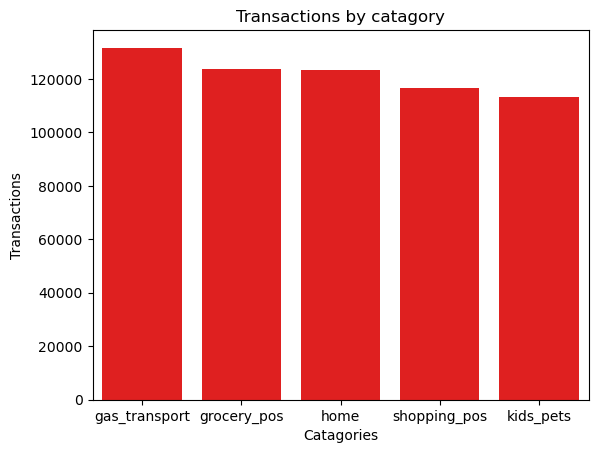

In [16]:
count_of_transac=df['category'].value_counts().head(5)
#what this essentially does is counts the number of transactions per catagory
#count_of_transac is a df, so we print its index on y axis and values on x axis
sns.barplot(x=count_of_transac.index,y=count_of_transac.values,color='red')
plt.xlabel('Catagories')
plt.ylabel('Transactions')
plt.title('Transactions by catagory')
plt.show()

By this we can conclude that the highest number of credit card transactions took place in the 'gas_transport' catagory

2.Active hours: Which hours of the day recorded the most number of transactions?

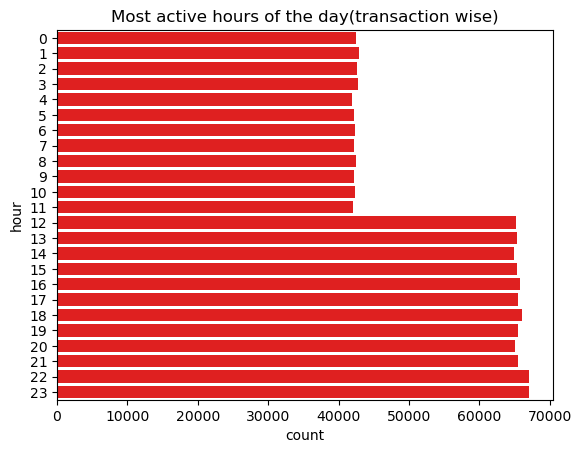

In [17]:
#extracting hour from the datetime column
df['hour_of_transac']=df['trans_date_trans_time'].dt.hour
transactions_per_hour=df['hour_of_transac'].value_counts()
#converting to a dataframe for horizontal barplot
transactions=transactions_per_hour.reset_index()
transactions.columns=['hour','count']
sns.barplot(x='count',y='hour',data=transactions,color='red',orient='h')

plt.title('Most active hours of the day(transaction wise)')
plt.show()

Hours 22 and 23, that is 10pm to 11pm and 11pm to 12am record the most number of credit card transactions. People tend to be more finacially active during the late hours!

3.Busy days: Which days out of the week were the most busiest in terms of transactions?

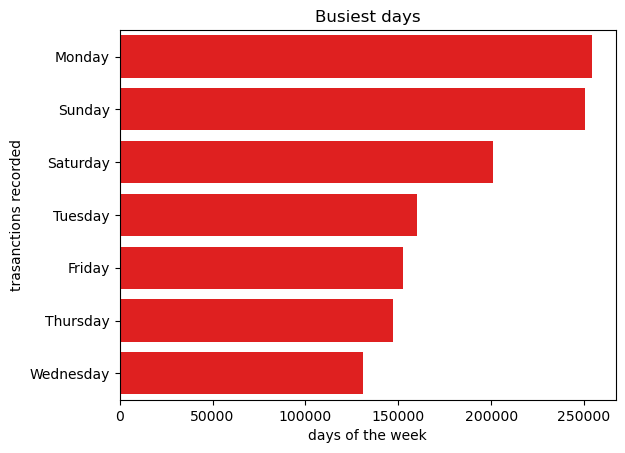

In [18]:
#extracting the day from datetime
df['day']=df['trans_date_trans_time'].dt.day_of_week
transactions_by_day=df['day'].value_counts()
day_names={
	0:'Monday',
	1:'Tuesday',
	2:'Wednesday',
	3:'Thursday',
	4:'Friday',
	5:'Saturday',
	6:'Sunday'
}
transactions_by_day.index=transactions_by_day.index.map(day_names)
#this assigns the following index names to this series
sns.barplot(x=transactions_by_day.values,y=transactions_by_day.index,orient='h',color='red')
plt.xlabel('days of the week')
plt.ylabel('trasanctions recorded')
plt.title('Busiest days')
plt.show()

From the above depiction it becomes clear that Mondays and Sundays record the most number of creedit card transactions in the week.

4.Gender-based analysis: Out of the two genders, which one sepnds the most amount on the card?

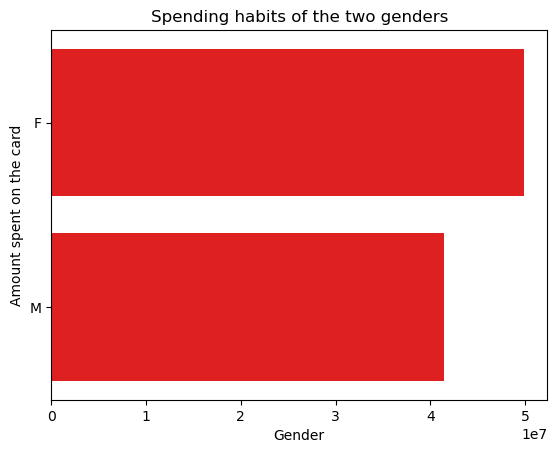

In [34]:
transactions_by_gender=df.groupby('gender')['amt'].sum()
sns.barplot(x=transactions_by_gender.values,y=transactions_by_gender.index,color='red',orient='h')
plt.xlabel('Gender')
plt.ylabel('Amount spent on the card')
plt.title('Spending habits of the two genders')
plt.show()

This graph shows that on an average women spend a lot more money on their card than men

FRAUDULENT ANALYSIS

1. Job Fradulency statistics: People employed under which jobs tend to do more fraud transactions?

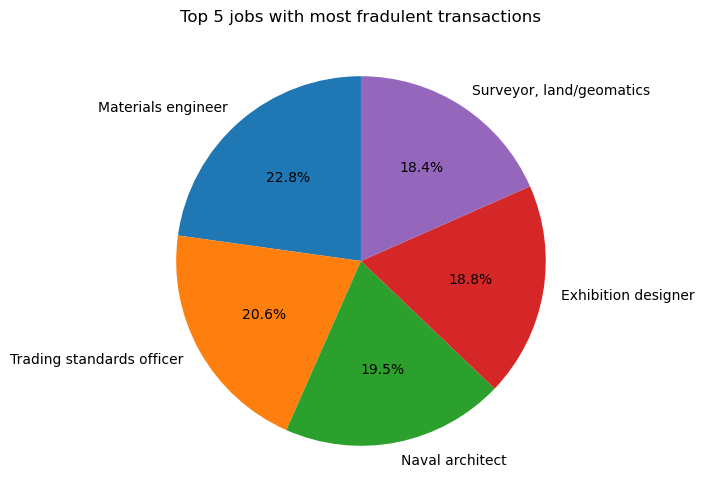

In [49]:
job_fradulency=df.groupby('job')['is_fraud'].sum().sort_values(ascending=False).head(5).reset_index()
job_fradulency.set_index('job')['is_fraud'].plot.pie(
	autopct='%1.1f%%',
	startangle=90,
	figsize=(6,6),
	title='Top 5 jobs with most fradulent transactions'
)
plt.ylabel('')
plt.show()

This pie chart depicts the top 5 jobs with the most number of fraudulent transactions, with number one being that of a Materials Engineer.

2. Active hours: What are the most active hours to commit fraud transactions?

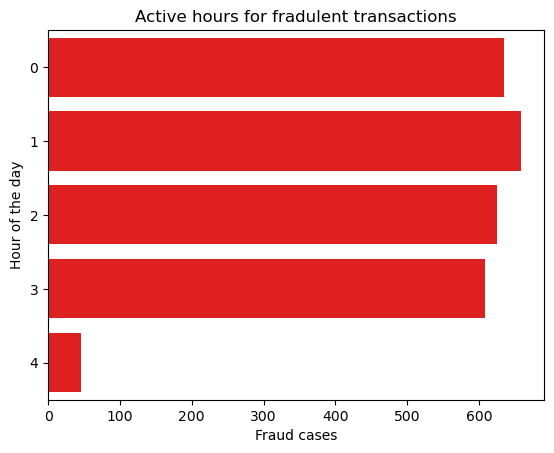

In [53]:
df['hours']=df['trans_date_trans_time'].dt.hour
fraud_hours=df.groupby('hours')['is_fraud'].sum().head(5).sort_values(ascending=False)
sns.barplot(x=fraud_hours.values,y=fraud_hours.index,orient='h',color='red')
plt.xlabel("Fraud cases")
plt.ylabel("Hour of the day")
plt.title("Active hours for fradulent transactions")
plt.show()

We conclude that hours 12am to 4 in the morning are actually the most common hours for fraud transactions

3.Gender-based analysis II : Which gender commits more fradulent crimes?

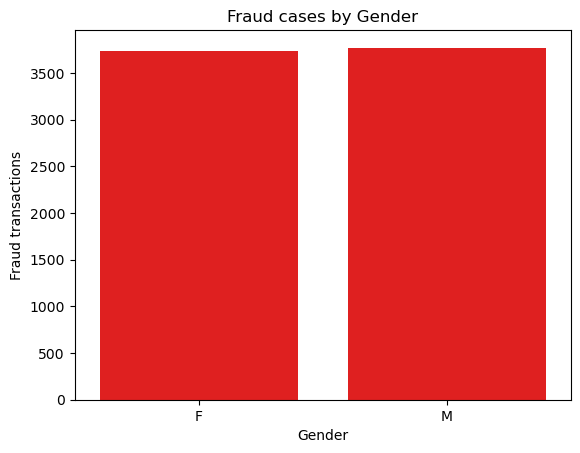

In [55]:
fraud_by_gender=df.groupby('gender')['is_fraud'].sum()
sns.barplot(x=fraud_by_gender.index,y=fraud_by_gender.values,color='red')
plt.xlabel('Gender')
plt.ylabel('Fraud transactions')
plt.title("Fraud cases by Gender")
plt.show()

This shows that although there is not much of a difference betwene the number of fraud cases between the two, Males tend to commit more fraud credit card transactiosn than women.

CONCLUSION.
During this analysis, I have uncovered key points in credit card transactions patterns and fraud analysis, all of which have been performed above. This analysis points out crucial transaction patterns, like active spending hours, who spends more, what is busier-weekends or weekdays, and the same for fradulent cases- which jobs commit the most fradulent crimes, which hours report most fraud activity, etc. Overall, this analysis has helped me learn a lot about financial cycle of the world and how transactions work in real time